<a href="https://colab.research.google.com/github/luckycharmz1/CIS-050/blob/main/Lab10_Code__Image_Generation_and_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Image Generation & Captioning

In this assignment we will work with PyTorch and Hugging Face to get more experience with its abstract classes. We will look at the simple task of image generation and use a number of tools to see how we could evaluate the accuracy of the image generation process.

The structure of the Assignment is as follows:

1. **Image Generation**  

   Here we will explore how the stable diffusion model generates images conditioned on a text prompt.


2. **Image Classification**

   Here we will use CLIP to evaluate captions that describe our images to see which labels most accurately describes our generated images.


3. **Image Captioning**

   We will then use both BLIP to generate a caption for our image and then use CLIP to measure how well the compares with other descriptive sequences.


4. **Image Evaluation**

   We will also use a visual question answering system to ask questions about our generated image.  In our prompt we asked for certain items in the image.  In the question answering system we can ask if those items are present in the image.  Finally, we will also look at a Multimodal Large Language Model to see how it describes our image and to see how close/far that is from the prompt we provided.


**Models we'll use in this exercise**

**Stable Diffusion** - generate image from prompt

**CLIP** - compare "text" labels with image

**BLIP** - given image generate a caption

**VQA** - answer questions about image




### INSTRUCTIONS:

* This notebook requires a T4 GPU.

* Questions are always indicated as **QUESTION:**, so you can search for this string to make sure you answered all of the questions. You are expected to fill out, run, and submit this notebook, as well as to answer the questions in the answers file as you did in a1. Please do not remove the output from your notebooks when you submit them as we'll look at the output as well as your code for grading purposes.

* \### YOUR CODE HERE indicates that you are supposed to write code or a prompt.

In [ ]:
import os

# Save in the current notebook's folder
output_folder = "./"  # or use "/content/"

# Ensure the output directory exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# # Test: save an image or file
# with open(os.path.join(output_folder, "example.txt"), "w") as f:
#     f.write("Saved right next to the notebook!")


## Setup

In [ ]:
!pip install -q diffusers --upgrade

In [ ]:
%%capture
# !pip install -q transformers==4.36.0
# !pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip uninstall -y bitsandbytes
!pip install diffusers transformers accelerate --upgrade

In [ ]:
!pip install -q invisible_watermark safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.7 MB/s eta 0:00:00


In [ ]:
#You can generate multiple images but not if you are using
# the T4 GPU.  THis assignment is designed to run with a single image

from PIL import Image
from pprint import pprint


def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

## Stable Diffusion - Generate Images with one object

We're going to generate an image using stable diffusion ([Model Card](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0)). You will specify a prompt with one object.  Be sure to specify that you want just one. I used "portrait of a dog in a chair"  How can we programatically tell if the generated image follows our prompt?  We can use some other tools that can examine the photo and tell if it's contents are what we asked for or if the generator fell short.




In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
#prompt =
### YOUR CODE HERE
prompt = "A portrait of kid in USA"
### END YOUR CODE
image = pipe(prompt).images[0]
image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

**QUESTION:**

1.a. What is the prompt you gave to generate the image with the single object?


Now save the image in your google drive so that when you find one you like you can re-use it in subsequent steps.  We'll ask you to put the `test_single.png` image you use into your a3 assignment folder so it becomes part of your submission.

In [ ]:
#images.save("test.png")
filename = output_folder + "/test_single.png"
image.save(filename)

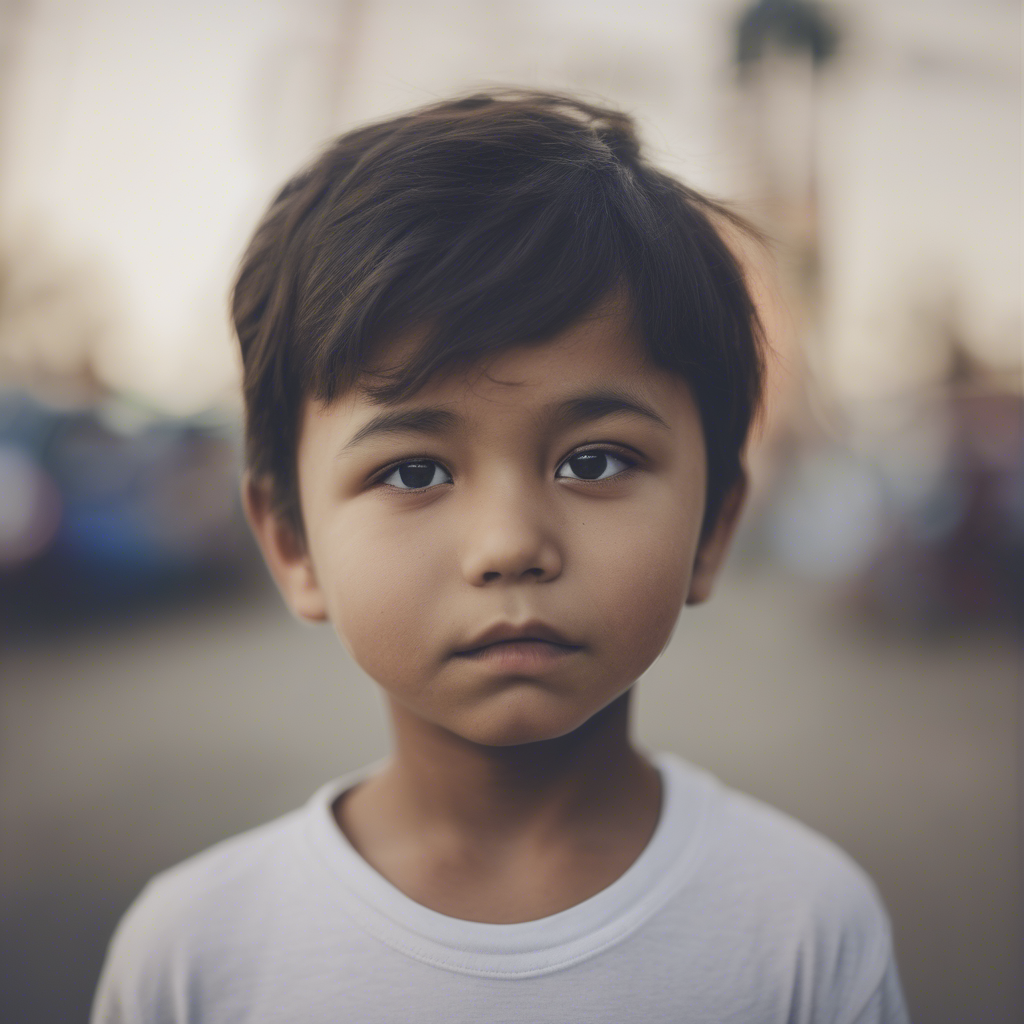

In [ ]:
image

## CLIP - evaluate image with one object

Now we'll use the CLIP model ([Model Card](https://huggingface.co/openai/clip-vit-base-patch32)) to see if our image resembles the object in the prompt.  You'll need to edit the list of captions below.  One label in the list should be the object you requested in the prompt.  Other labels can be similiar objects and one should be orthogonal (very different from your chosen object).  Your labels should each be one or two words long (e.g. cat, dog, blue whale). This is similar to building a classifier that "recognizes" images by predicting one of many possible labels.




In [ ]:
#!pip install -q transformers

In [ ]:
!pip install -q Pillow

In [ ]:
import io
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

In [ ]:
%%capture
cl_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
cl_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
from PIL import Image
img_url = "./test_single.png"
raw_image = Image.open(img_url, mode='r')

In [ ]:
### YOUR CODE HERE

captions = ["boy", "girl", "Man", "City"]

### END YOUR CODE

inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities


print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()
print()


                                     boy - 0.9282
                                    girl - 0.0099
                                     Man - 0.0584
                                    City - 0.0036




**QUESTION:**

2.1.b. What are the 1 or 2 word labels you gave to evaluate the image?


**QUESTION:**

2.1.c. What is the correct 1 or 2 word label and the score assigned to it by the CLIP model?



Great.  We know the CLIP model can handle more description of the content of the image.  Let's see how well that works.  Instead of your 1 or 2 word labels, create more descriptive captions of roughly 5 to 10 words each.  As with your labels, one caption in your list should describe the object you requested in the prompt. Other captions can be similiar objects and one should be orthogonal (very different from your chosen object).

In [ ]:
### YOUR CODE HERE

captions = ["A portarit of boy in a city",
            "happy girl in a city",
            "A walking old man",
            "Ape in the city Zoo"]

### END YOUR CODE

inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities


print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()
print()


             A portarit of boy in a city - 0.9959
                    happy girl in a city - 0.0000
                       A walking old man - 0.0031
                     Ape in the city Zoo - 0.0010




**QUESTION:**

2.1.d. What are the four 5 to 10 word captions you gave to evaluate the image?


**QUESTION:**

2.1.e. What is the correct 5 or 10 word caption and the score assigned to it by the CLIP model?




## Stable Diffusion -  Object Counts

We're going to generate another image using stable diffusion.  For this new image you will specify a prompt with 3 of the same object (Type 1), 2 of a different kind of object (Type 2) "in the background", and two other individual objects (Type 3) (Type 4) in the scene.  For example `3 cats in the garden with 2 snakes in the background with a flowering tree and a rose bush`. Make up your own prompt with your own set of type 1 to type 4 objects.

How can we programatically tell if the generated image follows our prompt?  We can use some other tools that can examine the photo and tell if it's contents are what we asked for or if the generator fell short.

Note that each time you run this cell you generate a new image. YOu may want to try several images before you select one for future processing.

**QUESTION:**

2.f. What is the prompt you gave to generate the image?


In [ ]:
#Your prompt here

### YOUR CODE HERE

# prompt = "3 cats in the garden with 2 snakes in the background with a flowering tree and a rose bush"
prompt = "3 cats with 2 chairs in the background with table and ball"

### END YOUR CODE
images = pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Now make sure you save the image you generate and want to work with as `test_counts.png`.  You will need to submit that image in your a3 directory.

In [ ]:

filename = output_folder + "/test_counts.png"
images.save(filename)

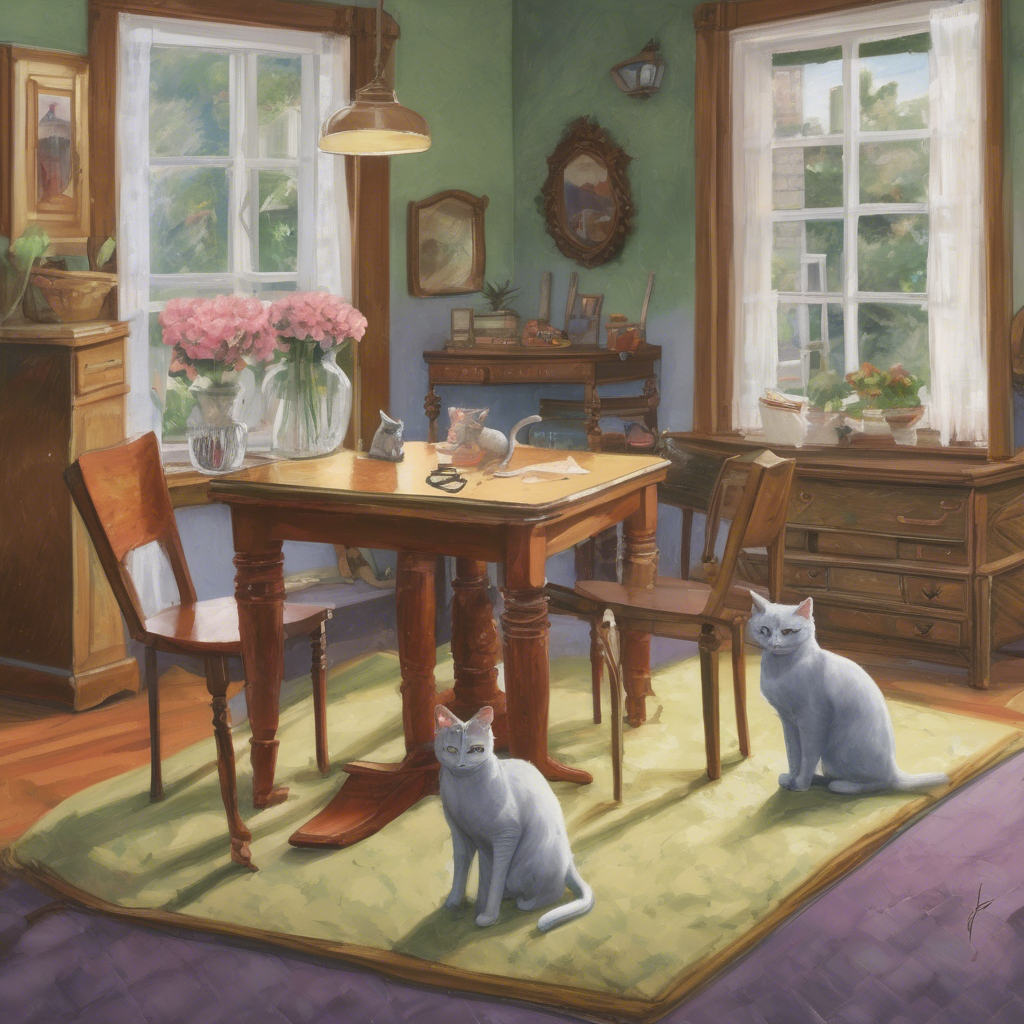

In [ ]:
images

## CLIP - evaluate your image

Now let's use CLIP again to see if your image has the correct number of Type 1 objects, that is the number you specified in your prompt.  Generate a set of four CLIP captions that asks about how many Type 1 objects are in the image. You should create one caption with the correct number of Type 1 object, two cpations with the wrong number of Type 1 objects, and one caption with a different kind of object.


In [ ]:
from PIL import Image
img_url = './test_counts.png'
raw_image = Image.open(img_url, mode='r')

In [ ]:
#Your captions here
### YOUR CODE HERE

captions = ["Three cats",
            "Two cats",
            "Five cats",
            "Three balls"]

### END YOUR CODE

inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities

print()
print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()



                              Three cats - 0.2794
                                Two cats - 0.0756
                               Five cats - 0.6446
                             Three balls - 0.0004



**QUESTION:**

2.1.g. What is the text of your highest scoring caption?

**QUESTION:**

2.1.h. What is the score associated with the highest scoring caption

**QUESTION:**

2.1.i. True or False, CLIP was able to correctly count my type 1 object.


## BLIP - create text with captioning

BLIP [Model card](https://huggingface.co/Salesforce/blip-image-captioning-large) is a model from Salesforce research that take an image as input and generate a matching text caption.  We'll use that functionality to run our generated image through and see how the output compares wth our prompt.


In [ ]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [ ]:
bl_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
bl_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large", torch_dtype=torch.float16).to("cuda")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [ ]:
img_url = './test_counts.png'

raw_image = Image.open(img_url, mode='r')


In [ ]:
# unconditional image captioning
inputs = bl_processor(raw_image, return_tensors="pt").to("cuda", torch.float16)

out = bl_model.generate(**inputs)
print(bl_processor.decode(out[0], skip_special_tokens=True))

painting of two cats sitting on a rug in a room


**QUESTION:**

3.1.j. What is the caption generated by BLIP to describe the stable diffusion image you fed to it?


## Test BLIP Caption with CLIP

Copy the unconditional BLIP caption into the captions you provide CLIP and add three other possibilities so you can generate some scores. All of your captions should be roughly the same length. These labels are an opportunity to how see well CLIP can pick out the details of your generated image.  



In [ ]:
from PIL import Image
img_url = './test_counts.png'
raw_image = Image.open(img_url, mode='r')

In [ ]:
#Your captions here
### YOUR CODE HERE
captions = ["there are three cats sitting at a table with two chairs",
            "there are three cats sitting on a sofa",
            "there are three cats sitting next to a table",
            "there are three cats in a room"]

### END YOUR CODE


inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities

print()
print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()




there are three cats sitting at a table with two chairs - 0.5968
  there are three cats sitting on a sofa - 0.0196
there are three cats sitting next to a table - 0.3268
          there are three cats in a room - 0.0568



**QUESTION:**

3.1.k. What are the 3 captions you added for the classification with CLIP?


**QUESTION:**

3.1.l. What is the score CLIP gave to the BLIP generated caption relative to your other captions?




## BLIP for Visual Question Answering

There's another variation of BLIP [Model Card](https://huggingface.co/Salesforce/blip-vqa-base) that has been designed to answer questions about the contents of an image.  We'll use that functionality to ask questions to see if the generated image corresponds to the prompt we provided.













In [ ]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base", torch_dtype=torch.float16).to("cuda")





preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

**QUESTION:**

4.1.m. How many <type 1> objects does the VQA say are present in your generated image?


In [ ]:
#question = "how many <Type 1 Objects> are in the picture?"
### YOUR CODE HERE
question = "How many cats are in the picture?"

### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

two


**QUESTION:**

4.1.n. How many <type 2> objects does the VQA say are present in your generated image?


In [ ]:
### YOUR CODE HERE
question = "How many tables are in the picture?"
### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

one


**QUESTION:**

4.1.o. How many <type 2> objects does the VQA say are present in the background of your generated image?


In [ ]:
### YOUR CODE HERE
question = "How many colors are in the background of the picture??"

### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

3


**QUESTION:**

4.1.p. How many <type 3> objects does the VQA say are present in your generated image?


In [ ]:
### YOUR CODE HERE
question = "How many chairs are in the picture?"

### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

four


**QUESTION:**

4.1.q. How many <type 4> objects does the VQA say are present in your generated image?


In [ ]:
### YOUR CODE HERE
question = "How many balls are in the picture?"
### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

one
